__손글씨 mnist를 이용하여 홀수/짝수를 구분해보기 (다층머셉트론 ~ 컨볼루션 신경망)__
### 1. 데이터셋 준비

In [8]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [132]:
# 데이터 전처리
width=28;height=28

x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

In [133]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [99]:
# 이진분류를 위해 0/1로

y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

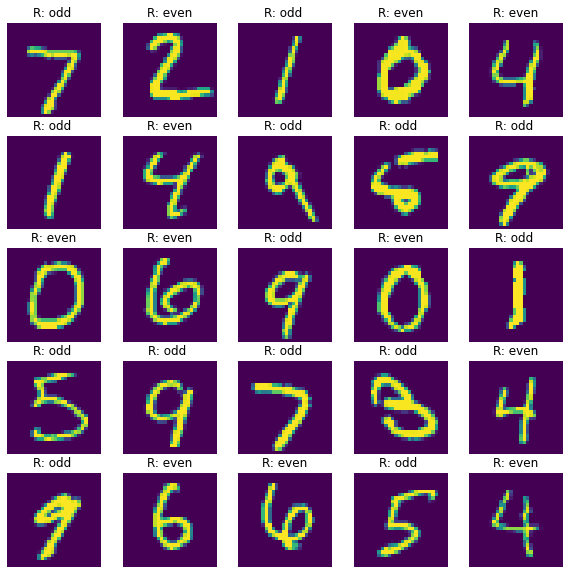

In [74]:
# 데이터 확인

plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i]:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even'
    
    sub_plt.set_title(sub_plt_title)
    
plt.show()

### 2. 레이어 준비
- Dropout

#### 1) 다층퍼셉트론 신경망 모델

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

In [75]:
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [77]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2973 - accuracy: 0.8802 - val_loss: 0.1502 - val_accuracy: 0.9487
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1256 - accuracy: 0.9558 - val_loss: 0.1004 - val_accuracy: 0.9670
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0893 - accuracy: 0.9690 - val_loss: 0.0795 - val_accuracy: 0.9744
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0713 - accuracy: 0.9754 - val_loss: 0.0697 - val_accuracy: 0.9777
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0592 - accuracy: 0.9786 - val_loss: 0.0662 - val_accuracy: 0.9781
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0508 - accuracy: 0.9822 - val_loss: 0.0678 - val_accuracy: 0.9769
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0445 - accuracy: 0.9847 - val_loss: 0.0689 - val_accuracy:

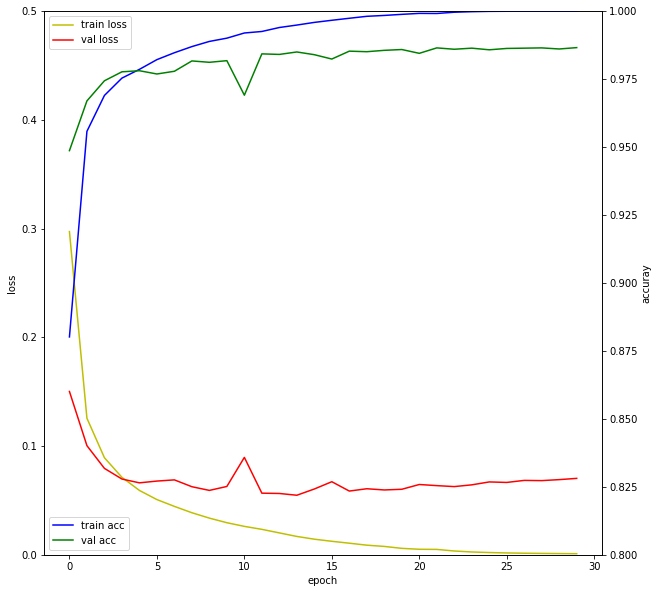

In [78]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [79]:
# 모델 평가하기

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.9860
## evaluation loss and metrics ##
[0.05540714040398598, 0.9860000014305115]


In [80]:
# 모델 사용하기

yhat_test = model.predict(x_test, batch_size=32)

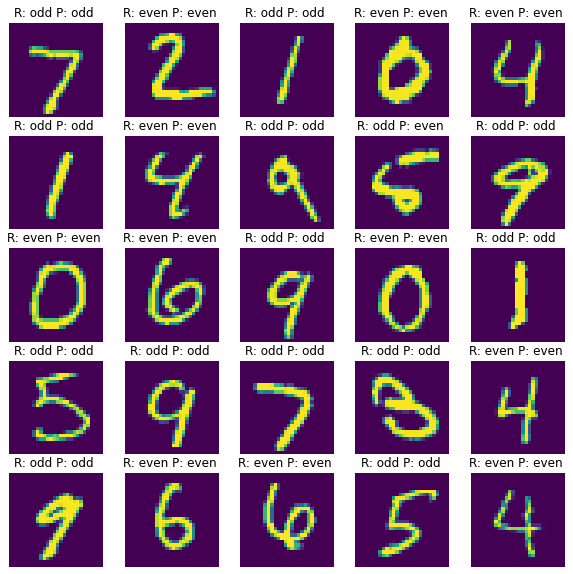

In [81]:
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

#### 2) 컨볼루션 신경망

In [128]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [134]:
x_train = x_train.reshape(50000, width, height, 1)
x_val = x_val.reshape(10000, width, height, 1)
x_est = x_test.reshape(10000, width, height, 1)

In [135]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 37s 24ms/step - loss: nan - accuracy: 0.0989 - val_loss: nan - val_accuracy: 0.0991
Epoch 2/30
1563/1563 [==============================] - 40s 26ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0991
Epoch 3/30
1563/1563 [==============================] - 40s 26ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0991
Epoch 4/30
1563/1563 [==============================] - 41s 26ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0991
Epoch 5/30
1563/1563 [==============================] - 41s 26ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0991
Epoch 6/30
1563/1563 [==============================] - 39s 25ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0991
Epoch 7/30
1563/1563 [==============================] - 40s 26ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0991
Epoch 8/30
1563/1563

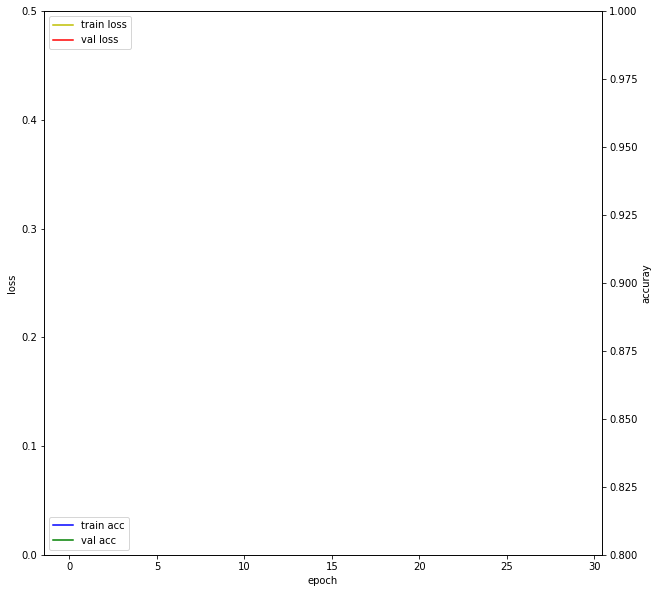

In [136]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [137]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

ValueError: in user code:

    C:\Users\hj\Anaconda3\envs\test_ten\lib\site-packages\tensorflow\python\keras\engine\training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\hj\Anaconda3\envs\test_ten\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\hj\Anaconda3\envs\test_ten\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\hj\Anaconda3\envs\test_ten\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\hj\Anaconda3\envs\test_ten\lib\site-packages\tensorflow\python\keras\engine\training.py:909 test_step  **
        y_pred = self(x, training=False)
    C:\Users\hj\Anaconda3\envs\test_ten\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\hj\Anaconda3\envs\test_ten\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_22 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 784]


In [ ]:
yhat_test = model.predict(x_test, batch_size=32)

In [ ]:
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

#### 3) 깊은 컨볼루션 신경망 모델

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuray'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32,
                validation_data=(x_val, y_val))

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)